In [1]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
from wordcloud import WordCloud
import numpy as np
import re
import collections
from collections import Counter
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
from textblob import TextBlob 

In [2]:
df = pd.read_json('new.json')

In [3]:
df

,cleaned_text
0,kanechrism moonah73 asleep christopher england...
1,leg stump half volley perfect freebie 1st ball...
10,alanzarena still starcs first ball half volley
100,vikrantgupta73 half volley sir way ball ashes
101,rt regreagan2 gradecricketer seconds starc tak...
...,...
995,goal swanborough jaan stanley played left effo...
996,lmesolene
997,rt chesterfieldyth goalllll chesterfieldfc ven...
998,goalllll chesterfieldfc venomous volley blakel...


In [4]:
df.rename(columns = {'cleaned_text':'text'}, inplace = True)

In [5]:
df.head()

,text
0,kanechrism moonah73 asleep christopher england...
1,leg stump half volley perfect freebie 1st ball...
10,alanzarena still starcs first ball half volley
100,vikrantgupta73 half volley sir way ball ashes
101,rt regreagan2 gradecricketer seconds starc tak...


In [6]:
def cleantext(text):
    text = re.sub(r'@[A-Za-z0-9]+','',text) #Remove @mention
    text = re.sub(r'#','',text) # Revoe the # symbol
    text = re.sub(r'rt[\s]+','',text) # Remove RT
    text = re.sub(r'https?:\/\/\S+','',text) # Remove the Hyper link
    
    return text

df['text'] = df['text'].apply(cleantext)

df

,text
0,kanechrism moonah73 asleep christopher england...
1,leg stump half volley perfect freebie 1st ball...
10,alanzarena still starcs first ball half volley
100,vikrantgupta73 half volley sir way ball ashes
101,regreagan2 gradecricketer seconds starc takes ...
...,...
995,goal swanborough jaan stanley played left effo...
996,lmesolene
997,chesterfieldyth goalllll chesterfieldfc venomo...
998,goalllll chesterfieldfc venomous volley blakel...


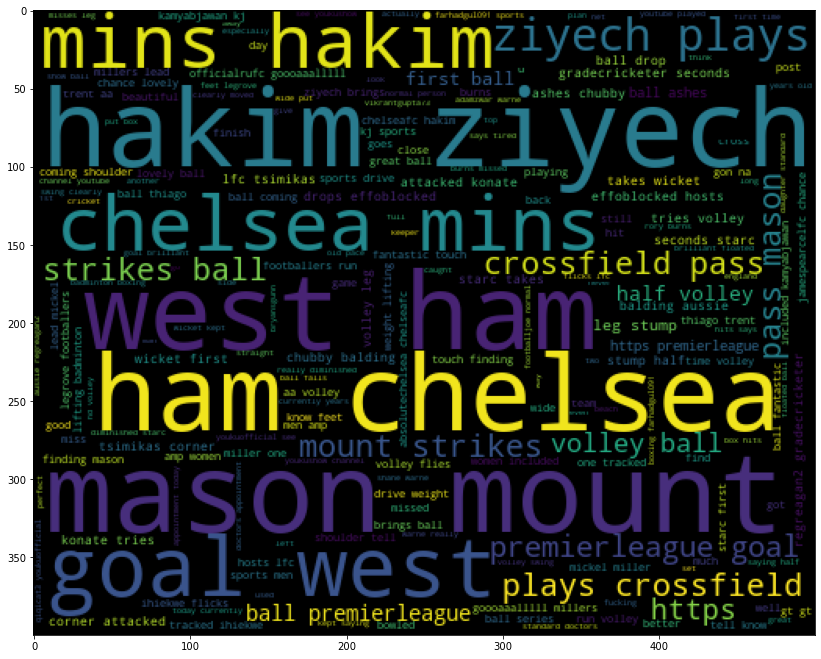

In [7]:
wc = WordCloud(width=500,height=400,min_font_size=1,background_color='black')

wc_text = wc.generate(df['text'].str.cat(sep = " "))

plt.figure(figsize=(14,12))
plt.imshow(wc_text)
plt.show()

In [8]:
corpus = []
for msg in df['text'].tolist():
    for word in msg.split():
        corpus.append(word)

In [9]:
len(corpus)

12298

In [10]:
Counter(corpus).most_common(25)

[('ball', 852),
 ('volley', 472),
 ('mount', 341),
 ('ziyech', 316),
 ('goal', 303),
 ('mason', 299),
 ('https', 282),
 ('hakim', 280),
 ('pass', 274),
 ('west', 270),
 ('chelsea', 270),
 ('ham', 269),
 ('44', 265),
 ('plays', 258),
 ('mins', 257),
 ('crossfield', 257),
 ('strikes', 257),
 ('premierleague', 249),
 ('first', 135),
 ('half', 131),
 ('leg', 72),
 ('ashes', 72),
 ('stump', 68),
 ('starc', 63),
 ('wicket', 49)]

In [11]:
def getPolarity(text):
    return TextBlob(text).sentiment.polarity

df['Polarity'] = df['text'].apply(getPolarity)

In [12]:
df

,text,Polarity
0,kanechrism moonah73 asleep christopher england...,0.000000
1,leg stump half volley perfect freebie 1st ball...,0.400000
10,alanzarena still starcs first ball half volley,0.041667
100,vikrantgupta73 half volley sir way ball ashes,-0.166667
101,regreagan2 gradecricketer seconds starc takes ...,0.250000
...,...,...
995,goal swanborough jaan stanley played left effo...,0.000000
996,lmesolene,0.000000
997,chesterfieldyth goalllll chesterfieldfc venomo...,0.000000
998,goalllll chesterfieldfc venomous volley blakel...,0.000000


In [13]:
def getAnalysis(score):
    if score < 0:
        return 'Negative'
    elif score == 0:
        return 'Neutral'
    else:
        return 'Positive'

In [14]:
df['Analysis'] = df['Polarity'].apply(getAnalysis)

In [15]:
df

,text,Polarity,Analysis
0,kanechrism moonah73 asleep christopher england...,0.000000,Neutral
1,leg stump half volley perfect freebie 1st ball...,0.400000,Positive
10,alanzarena still starcs first ball half volley,0.041667,Positive
100,vikrantgupta73 half volley sir way ball ashes,-0.166667,Negative
101,regreagan2 gradecricketer seconds starc takes ...,0.250000,Positive
...,...,...,...
995,goal swanborough jaan stanley played left effo...,0.000000,Neutral
996,lmesolene,0.000000,Neutral
997,chesterfieldyth goalllll chesterfieldfc venomo...,0.000000,Neutral
998,goalllll chesterfieldfc venomous volley blakel...,0.000000,Neutral


In [16]:
# get Percentage Positive Tweets

ptweets = df[df.Analysis =='Positive']
ptweets = ptweets['text']

# get Percentage negative Tweets

ntweets = df[df.Analysis =='Negative']
ntweets = ntweets['text']

# get Percentage neutal Tweets

n_tweets = df[df.Analysis =='Neutral']
n_tweets = n_tweets['text']

In [19]:
print("Positive Tweets: ",round((ptweets.shape[0]/df.shape[0])*100,1))
print(" Negative Tweets: ",round((ntweets.shape[0]/df.shape[0])*100,1))
print("  Neutral Tweets: ",round((n_tweets.shape[0]/df.shape[0])*100,1))

Positive Tweets:  34.8
 Negative Tweets:  16.2
  Neutral Tweets:  49.0
